**Next Word Prediction:**

**Importing The Required Libraries:**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
"""
    Dataset: http://www.gutenberg.org/cache/epub/5200/pg5200.txt
    Remove all the unnecessary data and label it as Metamorphosis-clean.
    The starting and ending lines should be as follows.

"""


file = open("/content/drive/MyDrive/Colab Notebooks/metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)

print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover it and seemed ready to slide off any moment. H'

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin  He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections  The bedding was hardly able to cover it and seemed ready to slide off any moment  His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked   “What’s happened to me ” he th'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)

data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. “What’s happened me?” thought. It wasn’t dream. room, proper human room altho'

**Tokenization:**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('/content/drive/MyDrive/Colab Notebooks/tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[8, 33, 272, 16, 34, 725, 108, 726, 273, 35]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2800


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  4010


array([[  8,  33],
       [ 33, 272],
       [272,  16],
       [ 16,  34],
       [ 34, 725],
       [725, 108],
       [108, 726],
       [726, 273],
       [273,  35],
       [ 35, 727]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [  8  33 272  16  34]
The responses are:  [ 33 272  16  34 725]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Creating the Model:**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             28000     
                                                                 
 lstm_2 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 2800)              2802800   
                                                                 
Total params: 15879800 (60.58 MB)
Trainable params: 15879800 (60.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Plot The Model:**

In [ ]:
import keras
print(keras.__version__)


2.14.0


In [ ]:
!pip install --upgrade keras


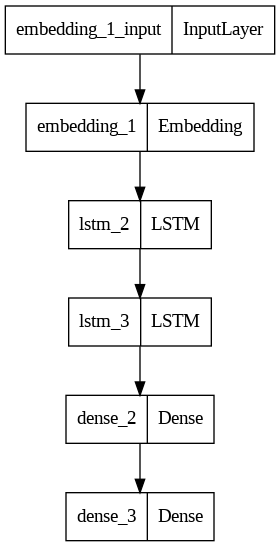

In [ ]:

from tensorflow import keras
from keras.utils import plot_model

keras.utils.plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/model.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

**Compile The Model:**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
63/63 [==============================] - ETA: 0s - loss: 7.9433
Epoch 1: loss improved from inf to 7.94333, saving model to /content/drive/MyDrive/Colab Notebooks/nextword1.h5
63/63 [==============================] - 30s 372ms/step - loss: 7.9433 - lr: 0.0010
Epoch 2/150
63/63 [==============================] - ETA: 0s - loss: 7.9311
Epoch 2: loss improved from 7.94333 to 7.93111, saving model to /content/drive/MyDrive/Colab Notebooks/nextword1.h5
63/63 [==============================] - 28s 440ms/step - loss: 7.9311 - lr: 0.0010
Epoch 3/150
63/63 [==============================] - ETA: 0s - loss: 7.8933
Epoch 3: loss improved from 7.93111 to 7.89330, saving model to /content/drive/MyDrive/Colab Notebooks/nextword1.h5
63/63 [==============================] - 35s 564ms/step - loss: 7.8933 - lr: 0.0010
Epoch 4/150
63/63 [==============================] - ETA: 0s - loss: 7.7286
Epoch 4: loss improved from 7.89330 to 7.72862, saving model to /content/drive/MyDrive/Colab Noteboo